# Hi!! This is Sakshi Soni

## Task-2: Prediction using Unsupervised ML

In this task we are going to predict the optimum number of clusters and will represent it virtually. 

### Importing Essential Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

### Importing Dataset

In [2]:
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### Number of rows and columns in dataset

In [3]:
iris_df.shape

(150, 4)

### Checking Missing Values

In [4]:
iris_df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

# Finding optimal number of Clusters

## Elbow Method

Compute clustering algorithm (e.g., k-means clustering) for different values of k. For instance, by varying k from 1 to 10 clusters.
For each k, calculate the total within-cluster sum of square (wss).
Plot the curve of wss according to the number of clusters k.
The location of a bend (knee) in the plot is generally considered as an indicator of the appropriate number of clusters.


In [5]:
x = iris_df.iloc[:, [0, 1, 2, 3]].values
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

### Plotting the graph

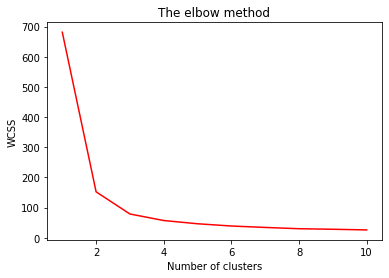

In [6]:
plt.plot(range(1, 11), wcss,color='red')
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

The optimum clusters is where the elbow occurs.
Therefore from the graph we choose the number of clusters as "3".

### Applying kmeans to the dataset

In [7]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

### Visualising the clusters

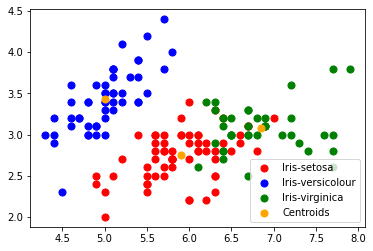

In [8]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 50, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 50, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 50, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 50, c = 'orange', label = 'Centroids')

plt.legend()
plt.show()

# Task Completed